<a href="https://colab.research.google.com/github/twlizotte/DS595-Machine-Learning-for-Engineering-and-Science-Applications/blob/main/Lizotte_CaseStudy_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polymer Melt Flow Rate

This case study is based upon the excellent example below:

http://apmonitor.com/pds/index.php/Main/PolymerMeltFlowRate

Along with its github repository:

https://github.com/APMonitor/pds

and license:

https://github.com/APMonitor/pds/blob/main/LICENSE

In particular, as described on the web page above:

Polymer properties such as density, melt index, and melt flow rate must be kept within tight specifications for each grade. This case study is to analyze polymer production data to predict melt flow rate.

**Background:** There are gas phase and liquid slurry reactors that create polymers (polyethylene, polypropylene, polystyrene, and others) from chemical building blocks known as monomers (C2=, C3=, C4=, iC5=, and others). A catalyst is injected with the monomers under carefully controlled temperature and pressure conditions to cause a reaction that grows the polymer chains. Hydrogen is a chain transfer agent to stop the growth of the polymer chain. If the polymer chains grow too long then the polymer is too viscous for manufacturing in films, injection molding, or other applications.

This case study focuses on measurements of Melt Flow Rate (MFR) to determine the polymer viscosity based on reactor conditions. An accurate model is desirable so that the infrequent lab samples (every 2-8 hours) are supplemented with a virtual and continuous "soft sensor". A model that runs in real-time simulation alongside the physical reactor is called a digital twin.

| Label | Data File Tag   | Description |
|------|------|------|
|   Time  | | Timestamp of the measurements|
|   C3  | 513FC31103.pv| Propylene (C3=) Feed Rate (kg/hr)|
|   H2R  | 513HC31114-5.mv| Hydrogen to C3= Ratio|
|   Pressure  | 513PC31201.pv| Reactor Pressure (bar)|
|   Level  | 513LC31202.pv| Reactor Bed Level (m)|
|   C2  | 513FC31409.pv| Ethylene (C2=) Flow (kg/hr)|
|   Cat  | 513FC31114-5.pv| Catalyst Feed Rate (kg/hr)|
|   Temp  | 513TC31220.pv| Reactor Temperature|
|   MFR  | MFR| Melt Flow Rate (gm/10min)|

**References**

Hedengren, J. D. (2021, December 16). Polymer Melt Flow Rate, Machine Learning for Engineers. Retrieved from http://apmonitor.com/pds/index.php/Main/PolymerMeltFlowRate



# Naive solution

### Import Polymer MFR Data


Don't worry, the data has been cached on the github page for this class so you can access it directly by url. Easy!

In [ ]:
url = 'https://raw.githubusercontent.com/rcpaffenroth/DS595-Machine-Learning-for-Engineering-and-Science-Applications/main/data/polymer_reactor.txt'

Let's read the data through pandas.  It would be great to get to know pandas. It is an important tool for Data Science in Python.

![Book cover](https://images-na.ssl-images-amazon.com/images/I/51HuYEwAl2L._SX258_BO1,204,203,200_.jpg)

https://images-na.ssl-images-amazon.com/images/I/51HuYEwAl2L._SX258_BO1,204,203,200_.jpg

In [ ]:
import pandas as pd

# We can pass the url directly into pandas read_csv file
# to read a dataframe directly
data = pd.read_csv(url)

In [ ]:
data

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
...,...,...,...,...,...,...,...,...,...
2559,12-10-18 9:45,24437.988,0.185,31.025928,77.189499,24022.730,0.103966,81.783371,12.3
2560,12/17/2018 16:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,12/17/2018 18:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,12/27/2018 5:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


What does all this mean? 513FC31103.pv	513HC31114-5.mv	513PC31201.pv	513LC31202.pv	513FC31409.pv	513FC31114-5.pv	513TC31220.pv.   What do the column labels mean?  You probably want to map them to something more meaningful.

![?](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2W-Aq7YoFONiyUsix1x8wXnlesgqEyDShTA&usqp=CAU)

In [ ]:
data = data.set_axis(['Time','C3','H2R','Pressure','Level','C2','Cat','Temp','MFR'], axis=1)

In [ ]:
data

,Time,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
...,...,...,...,...,...,...,...,...,...
2559,12-10-18 9:45,24437.988,0.185,31.025928,77.189499,24022.730,0.103966,81.783371,12.3
2560,12/17/2018 16:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,12/17/2018 18:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,12/27/2018 5:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


Nice, now I know what they are. 🙂

## Regression Modeling

Now, we have the data and we know what they are. We learned a lot from Randy's 🧙 lecture and can't wait to try the machine learning algorithms. Let's start.

### Divide Data

What is the first step? Wow, Randy 🧙  said we need to divide the training set and the test set.

"Data is divided into train and test sets to separate a fraction of the rows for evaluating classification or regression models. A typical split is 80% for training and 20% for testing, although the range depends on how much data is available and the objective of the study."

The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

```python
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)
```

There are options such as `shuffle=True` to randomize the selection in each set.

One of those arguments is `random_state`; this argument, when set to a value, determines which rows go into the train and test splits. Make a mental note of the value we set, we may see it again later in the notebook! 🧙

In [ ]:
from sklearn.model_selection import train_test_split

# note how we set the random_state
train,test = train_test_split(data, test_size=0.2, shuffle=True, random_state=1)

Can't wait any longer to run the model?


#### Run model
Let's try linear regression using sklearn!

In [ ]:
from sklearn import linear_model
method = linear_model.LinearRegression()

What columns are used as features? What columns are used as labels?
Don't know? Then let's use them all first, except for time, since time is not important in this case.

**Features：**`C3, H2R, Pressure, Level, C2, Cat, Temp`

**label：** `MFR`


In [ ]:
# We call method.fit() to learn the parameters of our network
# to the specific data
model = method.fit(
    X = train[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),
    y = train['MFR'].to_numpy())

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: Input contains NaN????

![?](https://www.memecreator.org/static/images/memes/4724747.jpg)

Wow! We forgot to check if there are any null values in the dataset. 😞


`data.isnull()`  is used to check if there is null value in the dataset. We can sum them by using sum().

`data.info()` and `data.describe()` are usually used to check the properties and basic statistics of the data.

In [ ]:
# Let's check how many total missing values exist in our training set
train.isnull().sum().sum()

431

In [ ]:
# Let's do the same for the test set we made
test.isnull().sum().sum()

49

In [ ]:
# use train.info() to get each column's number of non-missing values (Non-Null Count)
# Note: train.info() is also useful to see what kind a data type (Dtype) pandas
  # has encoded the columns. Sometimes pandas might mistakenly think a column of numbers
  # is actually a column of strings, so always check beforehand!
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 1093 to 1061
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      2051 non-null   object 
 1   C3        1981 non-null   float64
 2   H2R       2048 non-null   float64
 3   Pressure  1979 non-null   float64
 4   Level     1979 non-null   float64
 5   C2        1979 non-null   float64
 6   Cat       1981 non-null   float64
 7   Temp      1979 non-null   float64
 8   MFR       2051 non-null   float64
dtypes: float64(8), object(1)
memory usage: 160.2+ KB


In [ ]:
train.describe()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
count,1981.000000,2048.000000,1979.000000,1979.000000,1979.000000,1981.000000,1979.000000,2051.000000
mean,25342.035768,0.178165,30.659640,77.659450,42662.841313,0.138533,80.137342,8.229449
std,1701.939333,0.079322,0.432810,0.930477,11375.945853,0.042061,0.846325,5.084612
min,16106.025000,0.000000,26.946344,74.575958,9610.464800,0.022162,77.760117,1.500000
25%,24397.914000,0.135000,30.444627,76.994495,34932.478500,0.113763,79.666259,3.700000
50%,25394.648000,0.172000,30.618645,77.501343,41954.355000,0.132688,80.035500,4.400000
75%,26434.447000,0.200000,30.928010,78.233005,50109.232500,0.156993,80.497383,12.900000
max,30083.688000,0.980000,32.674332,83.841675,106073.610000,0.677979,91.566544,38.000000


Yes, null values do exist in the dataset, let's delete them first.

`data.dropna()` is used to remove the rows that contain at least one null value.

In [ ]:
# assign new variables to versions of the data with no
# missing values
train_dropna = train.dropna()
test_dropna = test.dropna()

In [ ]:
train_dropna.isnull().sum().sum()

0

In [ ]:
test_dropna.isnull().sum().sum()

0

Now, let's try to run the model again!

In [ ]:
model = method.fit(
    X=train_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),
    y=train_dropna['MFR'].to_numpy())

Great!!! The model was successfully fit！ 🙂 Now, we can evaluate the performance on test set.

In [ ]:
from sklearn.metrics import mean_squared_error
r2 = method.score(test_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),test_dropna['MFR'].to_numpy())
mse = mean_squared_error(method.predict(test_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy()), test_dropna['MFR'].to_numpy())

print('R^2: ' + str(r2))
print('mse: ' + str(mse))

R^2: 0.42624499119957326
mse: 14.935927259730697


Ok, we already see things are interesting.  There are two different metrics (R^2 and mse)!   Hmmm....

## **Question 1** **(10 points)**

**Part 1 (5 points)**

What do R^2 and mse mean? Which is better for describing the performance of your algorithm?  Why?

__Answer__: R^2, or the Coefficient of determination, is defined as:

`R^2 = 1 - residual sum of squares/ total sum of squares (or data variance)`

MSE, or the Mean squared error, is defined as:

`MSE = sum(observed values - predicted values)/n`

n is number of data points...

R^2 is likely a better descriptor for the performance of our model, since it is a dimensionless value and therefore more intuitive to understand. Values for MSE will be better when they are 'smaller', but to define what is 'small' requires understanding the context of the data.

**Part 2 (5 points)**  

Try different variables to fit the model and test its performance.   What do you notice?  Are some worse and some better?

Hint:
`model = method.fit(train_dropna[['Your selected variable 1', 'Your selected variable 2']].to_numpy(),train_dropna['MFR'].to_numpy())`

__Answer__: I notice that most combinations of variables do not differ that much from one another, the majority having an `r2 ~20-30%`, and an `mse ~20 units`. The best combination for predicting MFR was that of `('Pressure', 'H2R')` and the worst was `(C3, Level)`. The printout below has more details.

In [ ]:
import itertools

varSet = {'C3','H2R','Pressure','Level','C2','Cat','Temp'}
numVars = 2

varCombos = list(itertools.combinations(varSet, numVars))
metrics = list(['r2','mse'])

dataQ1 = []
for n in varCombos:
  var1 = n[0]
  var2 = n[1]

  model = method.fit(train_dropna[[var1, var2]].to_numpy(),train_dropna['MFR'].to_numpy())

  r2 = method.score(test_dropna[[var1, var2]].to_numpy(),test_dropna['MFR'].to_numpy())
  mse = mean_squared_error(method.predict(test_dropna[[var1, var2]].to_numpy()), test_dropna['MFR'].to_numpy())

  row = [r2, mse]
  dataQ1.append(row)

table = pd.DataFrame(dataQ1, index=varCombos, columns=metrics)
maxLocation = table.idxmax(axis='index')
minLocation = table.idxmin(axis='index')

print('Maximum r2: ' + str(table['r2'].max()) + ', for ' + str(maxLocation[0]))
print('Minimum mse: ' + str(table['mse'].min()) + ', for ' + str(minLocation[1]))
print(table)

Maximum r2: 0.3275641298547487, for ('Pressure', 'H2R')
Minimum mse: 17.504776584559064, for ('Pressure', 'H2R')
                         r2        mse
(C3, Cat)          0.065705  24.321462
(C3, Temp)         0.048765  24.762452
(C3, Pressure)     0.208112  20.614342
(C3, C2)           0.158467  21.906697
(C3, Level)        0.034487  25.134125
(C3, H2R)          0.215510  20.421764
(Cat, Temp)        0.081893  23.900056
(Cat, Pressure)    0.230495  20.031664
(Cat, C2)          0.156436  21.959567
(Cat, Level)       0.053628  24.635844
(Cat, H2R)         0.292659  18.413422
(Temp, Pressure)   0.228368  20.087043
(Temp, C2)         0.086423  23.782139
(Temp, Level)      0.023750  25.413638
(Temp, H2R)        0.201070  20.797647
(Pressure, C2)     0.251681  19.480168
(Pressure, Level)  0.202188  20.768547
(Pressure, H2R)    0.327564  17.504777
(C2, Level)        0.075387  24.069427
(C2, H2R)          0.195642  20.938969
(Level, H2R)       0.185626  21.199694


# Solution with Feature Engineering

How did you choose the variables? Why use these variables instead of others?

![?](https://media.makeameme.org/created/its-a-feature-5b167b.jpg)

__Answer__: I chose the variables by creating a set of all variables and using itertools combinations function to get a list of all possible combinations. I then looped through each combo to generate a linear regression model and evaluate it as before. I tabluated the data and identified the combinations that resulted in the highest `r2` value or lowest `mse` value (in this case it happened to be the same combination for both... though I am not sure why). I did not select and any specific variables over others.

How about we create a heatmap to show the correlation between the variables?

In [ ]:
# import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

Still remember? Removing null values.

In [ ]:
data = data.dropna()

we can create a heatmap using `seaborn.heatmap()`

<ipython-input-212-4982c4d6cad5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


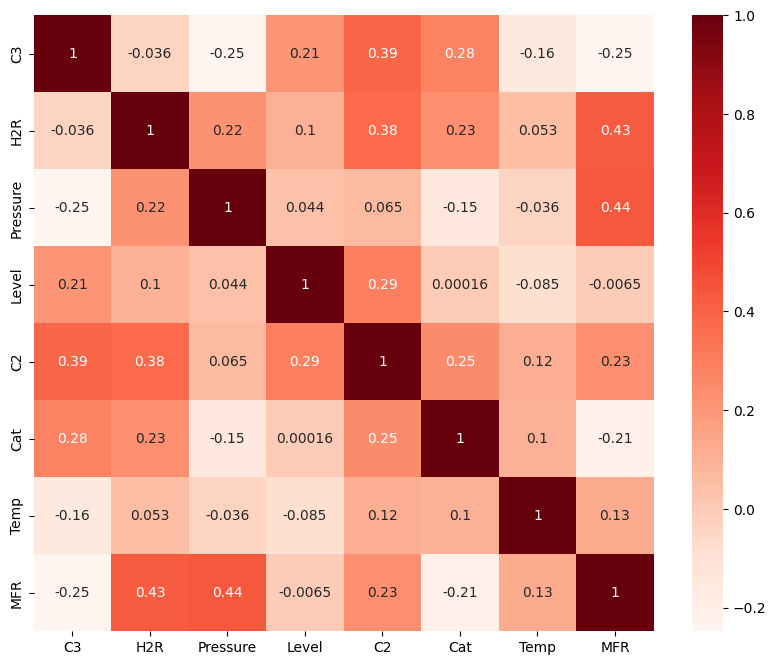

In [ ]:
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

## **Question 2** **(20 points)**

**Part 1 (5 points)**
What does correlation mean?

Correlation means, specifically between __two__ variables, that there exists a significant __linear__ relationship between them. Correlation coefficients range from -1 to 1, with the sign indicating the __direction__ of the linear relation and the magnitude indicating the __density__ of the data about an ideal, or 'expected', line. It is useful for capturing the direction and spread of a linear relationship, but cannot capture nonlinear aspects.

__Answer__:

**Part 2 (10 points)**
What are your observations? Which variables are strongly correlated with `MFR` and which variables are weakly correlated with `MFR`?

__Answer__: The variables `H2R` and `Pressure` are most strongly correlated with `MFR`. The weakest correlations will have a value close to 0, and in this case `Level` is the closest.


**Part 3 (5 points)**
Is a variable with a large *negative* correlation useful or not?

__Answer__: Yes. It can be useful to identify data which __does__ have a correlation with a given variable, however the linear relationship will be in a __negative__ direction. A large negative correlation is just as useful as a large positive correlation.



### Pair Plot

A pair plot shows the correlation between variables.

```python
sns.pairplot(data)
```

It has bar distributions on the diagonal and scatter plots on the off-diagonal. A pair plot also shows a different color (`hue`) by category `w`. Pair plots show correlations between pairs of variables that may be related and gives a good indication of features (explanatory inputs) that are used for classification or regression. Generate your own pair plot of the data.

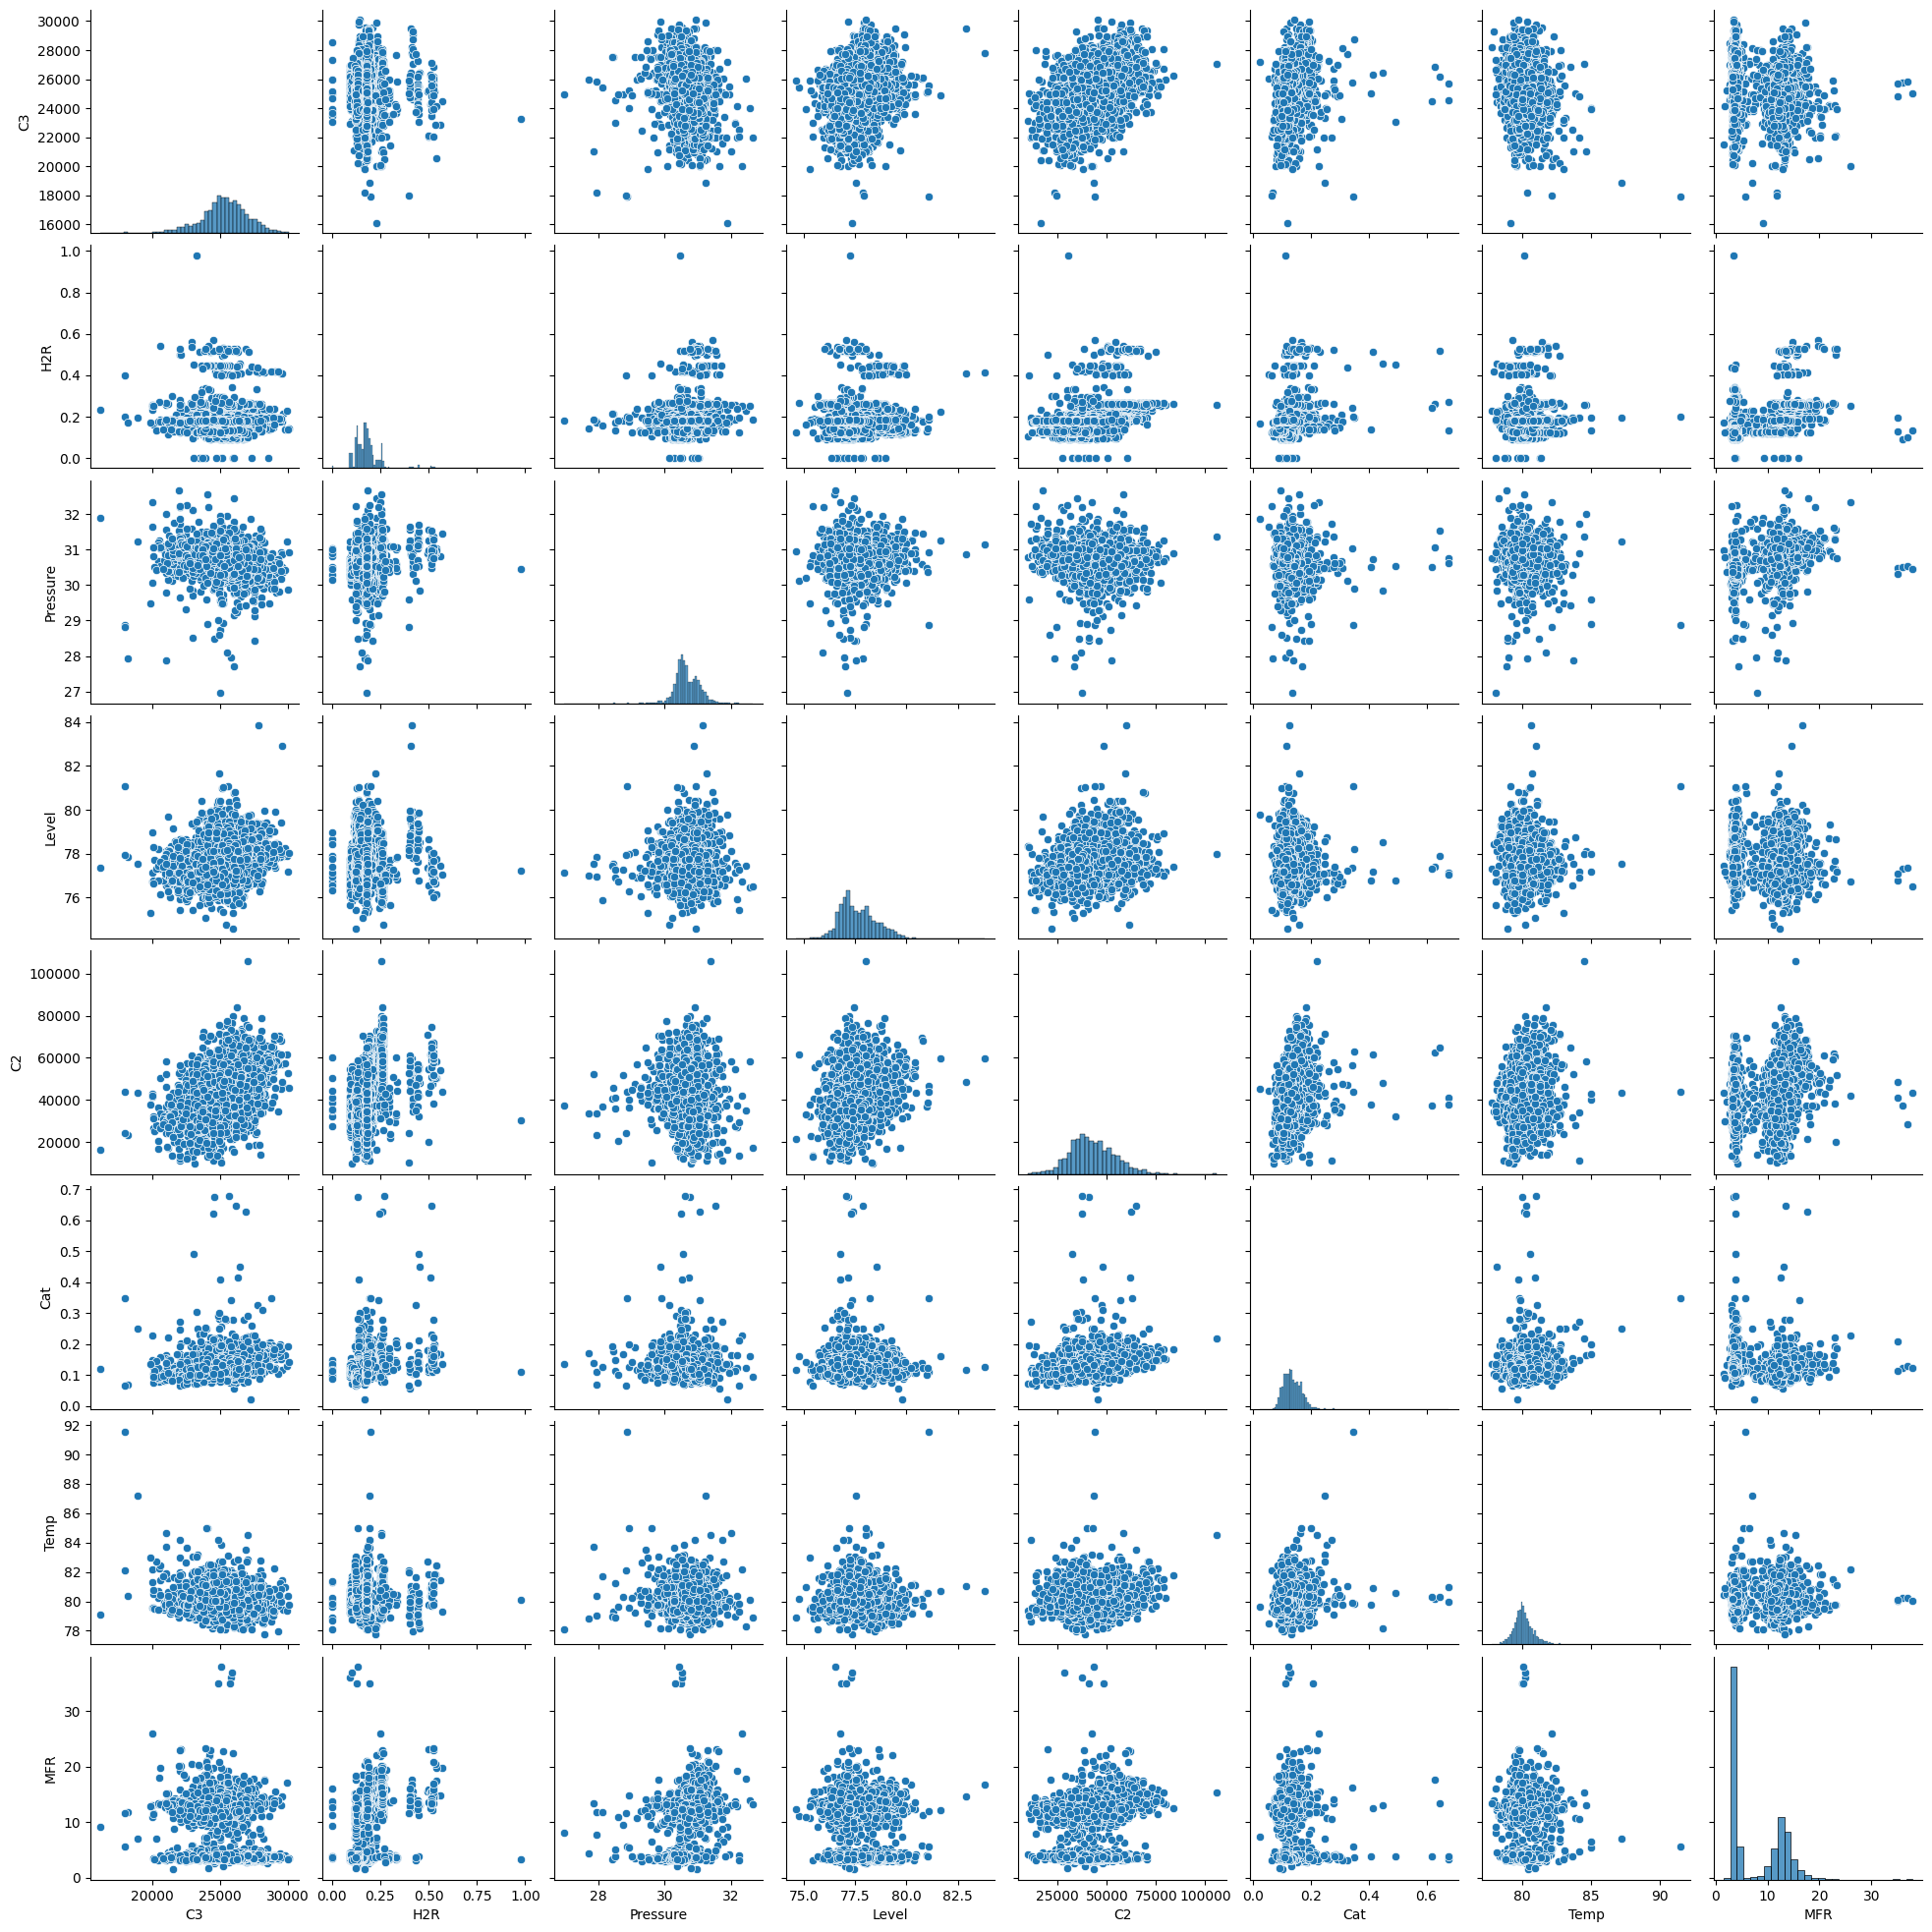

In [ ]:
sns.pairplot(data) # This will run for a little bit

### Joint Plot

Want to change the plot style? No problem! 👌

A joint plot shows two variables, with the univariate and joint distributions.

```python
sns.jointplot(x='H2R',y='MFR',data=data,kind="kde")
```

Generate your own joint plot with the data. Try `kind='reg'`, `'kde'`, and `'hex'` to see different joint plot styles.

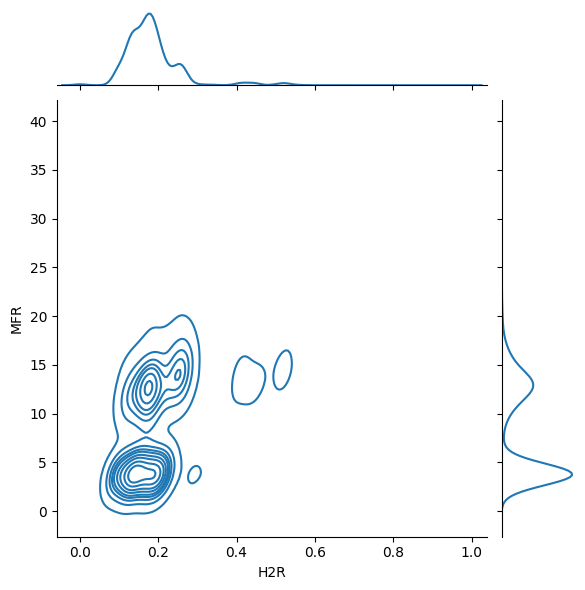

In [ ]:
sns.jointplot(x='H2R',y='MFR',data=data,kind="kde")

### Data Analysis with `ydata-profiling` (formerly known as pandas-profiling)

ydata - Profiling is a data analysis tool for a more in-depth summary of the data than the `descibe()` function. [Install the package](https://docs.profiling.ydata.ai/latest/getting-started/installation/) with:

```python
pip install --user ydata-profiling[notebook]
jupyter nbextension enable --py widgetsnbextension
```

<!-- **This idea is important!** You will need to install more packages than Colab provides, and this is an example of doing that.

NOTE:  You need to restart the Kernel before proceeding. The install only needs to run once.  We will talk about this in class. -->

In [ ]:
# first need to uninstall a conflicting version of a package,
# then install ydata-profiling
!pip uninstall typing-extensions -y
!pip install -U ydata-profiling[notebook] typing-extensions==4.6.0

# this line allows to use cool interactive widgets with a notebook
# which we will see in action in a few code cells below
!jupyter nbextension enable --py widgetsnbextension


Found existing installation: typing_extensions 4.5.0
Uninstalling typing_extensions-4.5.0:
  Successfully uninstalled typing_extensions-4.5.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pydantic to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━

In [ ]:
from ydata_profiling import ProfileReport

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


"Time" breaks the profiling. Remove this column from the data before generating your profile report.

In [ ]:
data = data.drop(['Time'], axis=1)

In [ ]:
# here we generate the big report
profile = ProfileReport(data, minimal=False)

ProfileReport takes a little time to render the results, please be patient. Next, we can view the report interactively with `profile.to_widgets()`

IMPORTANT NOTE: If you run the following cell and nothing appears, or you get some sort of warning message, try re-running the `profile = ProfileReport(data, minimal=False)` cell again, and then re-run `profile_to_widgets()` cell. The ProfileReport can be a little finicky with Colab.

In [ ]:
# This will make nice interface in the notebook
profile.to_widgets()

View the profile report in the Jupyter Notebook with `profile.to_widgets()`.

## **Question 3** **(10 points)**

Notice that the output of the previous cell is a collection of interactive tabs that contain useful information about our data. Expore the tabs to get familiar with why type of information is present.

Next, find the two most "relevant" variables to `MFR` and fit them with linear regression. Cut and paste their "Interaction" plots here.  Why do you think they are relevant?

Compare the results (r^2 and mse) using these variables with your previous experiments.

__Answer__: The most relevant variables to `MFR` are `H2R` and `Pressure`. They have the highest `r2` and lowest `mse` values when used to generate a model for `MFR` as was shown in __Question 1__. They were also shown to have the highest correlations of any variables in __Question 2__.

Note: No code is provided here since the linear regression was completed in __Question 1__ for all combinations.

INSERT INTERACTION PLOTS HERE (they are not displaying for me for some reason...)


In [ ]:
# See Question 1 Solution for linear regression results with 'Pressure' and 'H2R'

Tired of manually selecting variables? We can use the model to select best features (variables) automatically.

### Select Best Features

We can rank the features to determine the best set that predicts `MFR`.

```python
from sklearn.feature_selection import SelectKBest, f_regression
best = SelectKBest(score_func=f_regression, k='all')
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)
```

There is additional information on [Select K Best Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<BarContainer object of 7 artists>

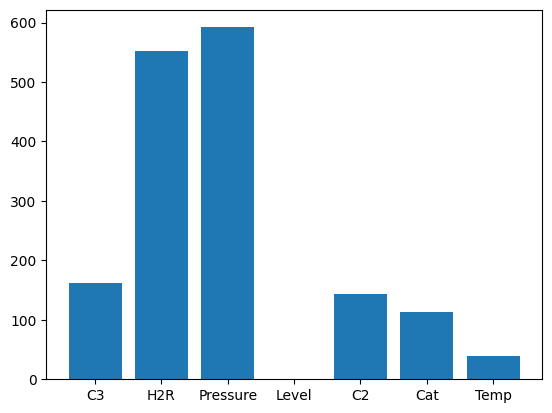

In [ ]:
x=data[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']]
z=data[['MFR']]

# These are various feature selection algorithms available
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pylab as plt

# First, instantiate the selection algorithm with the scoring criteria
# here is the documentation on the scoring criteria we selected:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
best = SelectKBest(score_func=f_regression, k='all')

# fit the selection algorithm on our data and return
# the f-statistic for each variable; the higher the score,
# the more "significant" the variable is
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)

## **Question 4** **(10 points)**

Based on the above results, select the variables you think are related to `MFR` and fit them with linear regression. Compare the results with the previous experiments.  What do observe?

__Answer__: Again, `Pressure` and `H2R` are shown to be the most significant variables in predicting `MFR` by these metrics. The linear regression with these variables was done in __Question 1__ and shown to have both the highest `r2` value and lowest `mse` value.


In [ ]:
# See Question 1 Solution for linear regression results with 'Pressure' and 'H2R'

# Solution with Feature Engineering + Data processing

The result of the model is not good enough? Still want to improve the performance further?

Randy 🧙 has a few questions for you. Are there any outliers in the data? Do all variables satisfy the assumptions of the linear model?


There are several graphical techniques to help detect outliers. A box or histogram plot shows outlying points. Make one now and examine it for outliers in each variable.

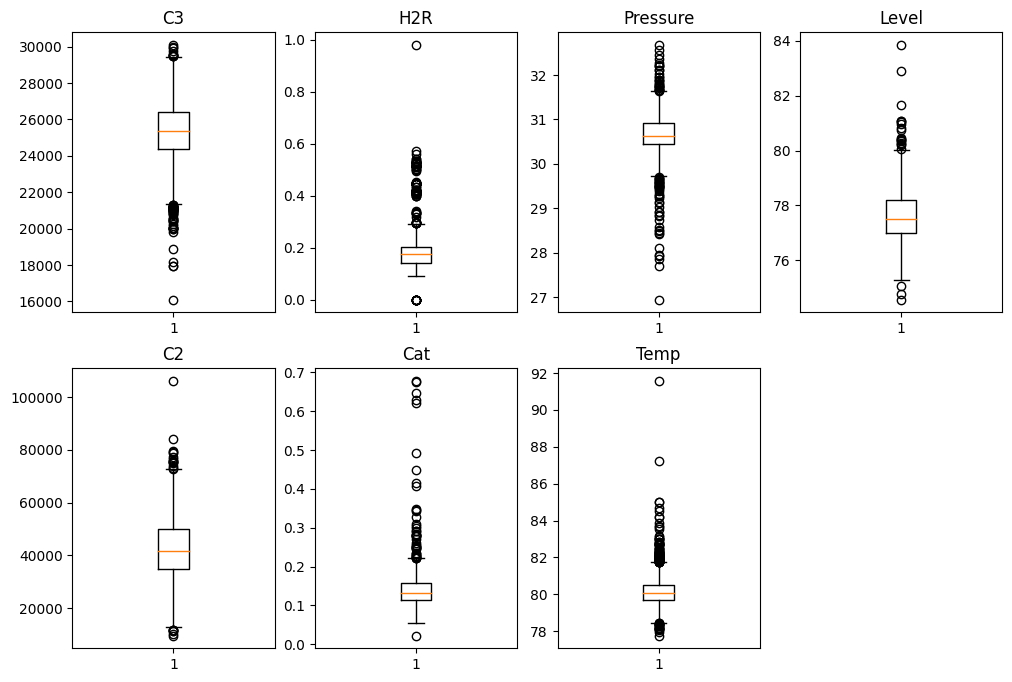

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))

# iterate over all of the columns
for i,c in enumerate(data.columns):
    if c != "MFR":
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

Remove outliers by removing select rows such as with:

```python
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]
```

to keep only values of `H2R` (Hydrogen to Monomer ratio) that are between 0.01 and 0.7.

In [ ]:
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]

Show the boxplot again to verify that the data set does not have the outliers you removed.

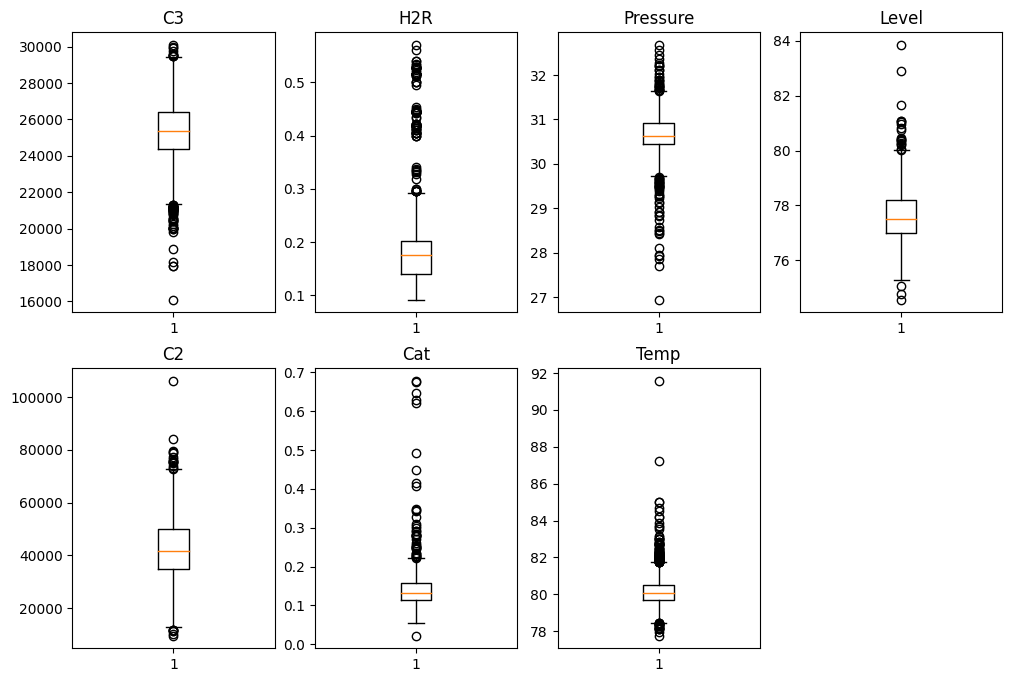

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))

# iterate over all of the columns
for i,c in enumerate(data.columns):
    if c != "MFR":
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

## **Question 5** **(10 points)**

Are there any other outliers in other variables? If so, please remove them.  How did you go about defining outliers?

__Answer__: Can do something with standard deviations?

In [ ]:
# Provide any code for Question 5 here
import matplotlib.pyplot as plt

data = data[data['C3']<0.7]
data = data[data['C3']>0.01]

data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]

data = data[data['Pressure']<0.7]
data = data[data['Pressure']>0.01]

data = data[data['Level']<0.7]
data = data[data['Level']>0.01]

%matplotlib inline
plt.figure(figsize=(12,8))

# iterate over all of the columns
for i,c in enumerate(data.columns):
    if c != "MFR":
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

# Important question!

Who controls the features that you process?  Are you stuck with the features provided by the original experiment?

**NO!!!!**

You have the power!  For example, any invertible transformation of the data can lead to new features or even new targets!   Actually any transformation whatsoever can lead to new features and targets.  Invertible just means that you can always recover your original data :-)

For example, we can apply log transformation to `MFR` and try and predict that instead.  Since the log is invertible, we can just predict that, get an prediction, and then apply the inverse of the log (the exponential map).

Create a new column for the natural log of (`MFR`) as `lnMFR`.

In [ ]:
import numpy as np
data['lnMFR'] = np.log(data['MFR'])

Check the results after log transformation

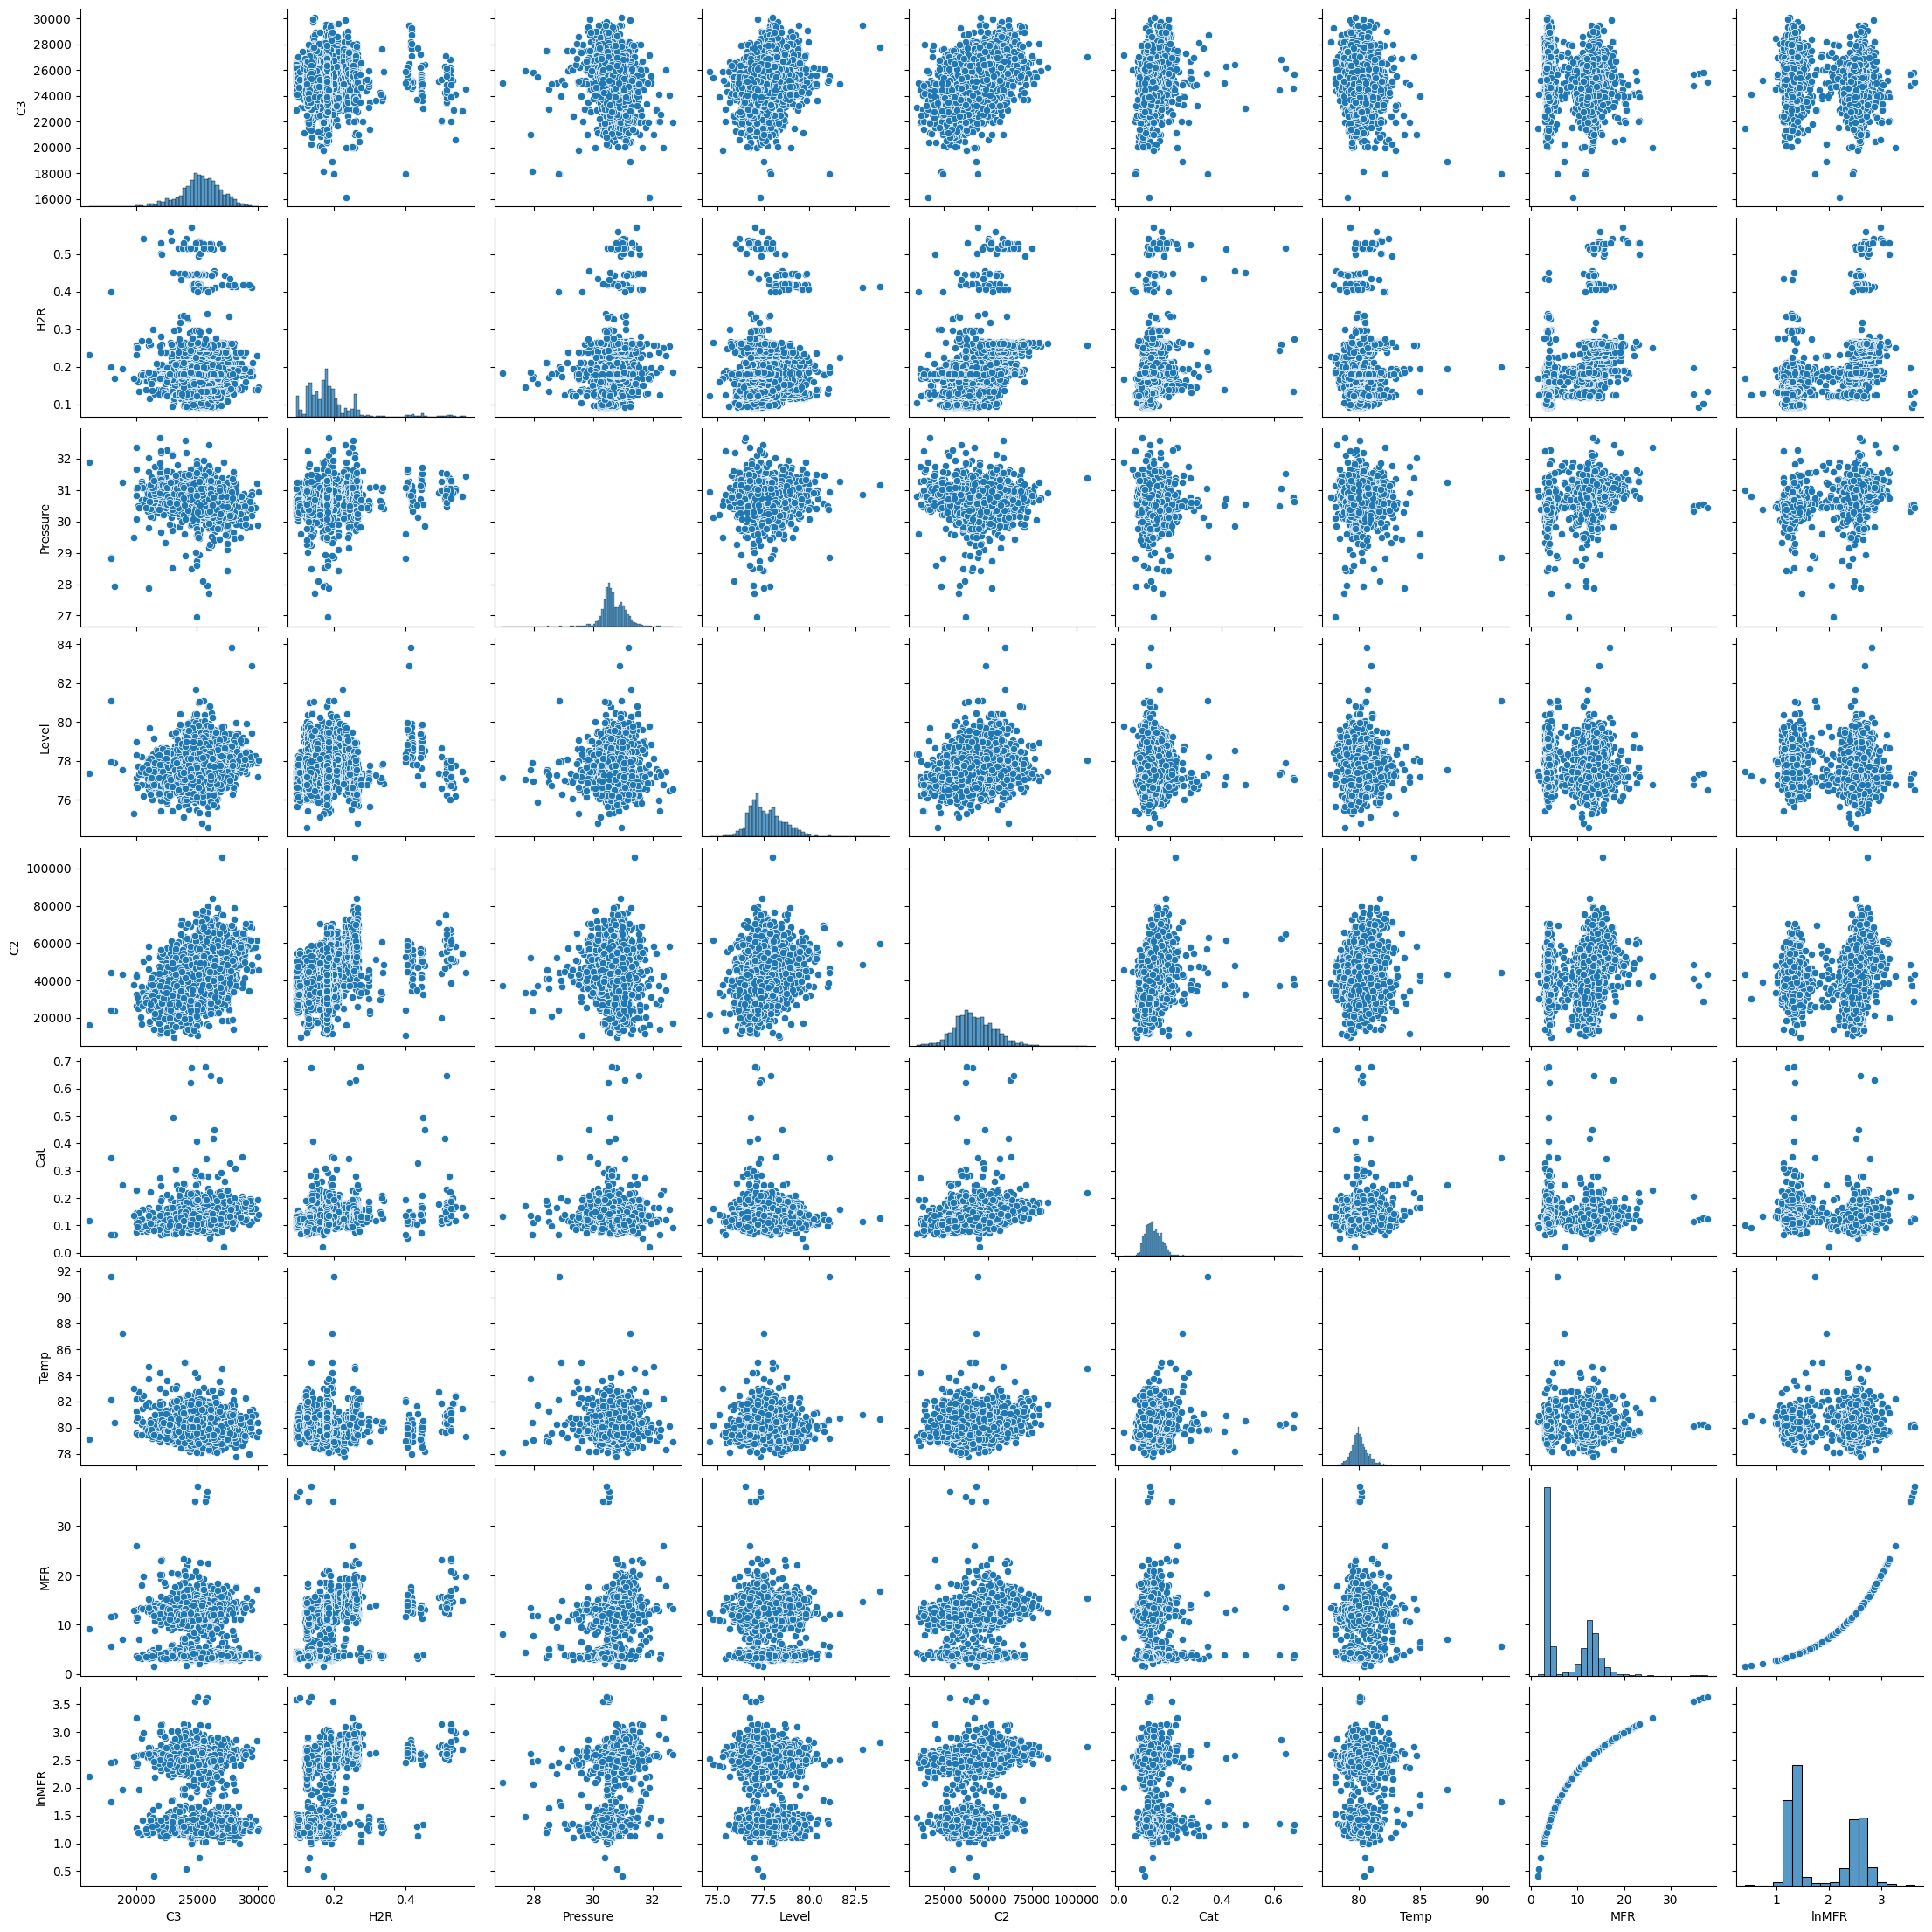

In [ ]:
sns.pairplot(data)

## **Question 6** (10 points)

Pick one or two different functions and apply the to `MFR` and see if a transformed `MFR` is easier to predict.  Does transforming `MFR` change what inputs give good predictions?

__Answer__: EXPLAIN YOUR OBSERVATIONS HERE


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

## **Question 7** (10 points)

Just like using transformations on the target (`MFR` in this case), you can use transformations on the inputs. Can you predict a transformed `MFR` from a set of transformed inputs?

Ok, things start to explode now with so many combinations. Just try a few :-)

__Answer__: EXPLAIN YOUR OBSERVATIONS HERE


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

### One important transformation:  Scaling the data

Scale data with the `StandardScalar` from `scikit-learn`. This has the effect of making each column have zero mean and have unit variance.

```python
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
```

In [ ]:
from sklearn.preprocessing import StandardScaler
# like most methods in sklearn, we first instantiate the algorithm
s = StandardScaler()

# then can use a shortcut function to fit and transform the data of interest
ds = s.fit_transform(data)

The value `ds` is returned as a `numpy` array so we need to convert it back to a `pandas` `DataFrame`.

```python
ds = pd.DataFrame(ds,columns=data.columns)
```

Re-use the column names from `data`.

In [ ]:
ds = pd.DataFrame(ds,columns=data.columns)

Now, we can check the results before/after scaling.

In [ ]:
data.describe()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR,lnMFR
count,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000
mean,25306.234407,0.184220,30.663528,77.651793,42541.785562,0.138636,80.145742,8.031756,1.881117
std,1706.422682,0.069459,0.423863,0.920032,11340.624549,0.041936,0.822809,5.077559,0.635984
min,16106.025000,0.092000,26.946344,74.575958,9610.464800,0.022162,77.760117,1.500000,0.405465
25%,24362.821500,0.140000,30.445727,76.993517,34795.535000,0.113805,79.678614,3.700000,1.308333
50%,25366.086500,0.175000,30.622256,77.498005,41580.888500,0.133056,80.044605,4.300000,1.458615
75%,26398.258750,0.202000,30.925738,78.210867,50019.041750,0.157279,80.497479,12.725000,2.543563
max,30083.688000,0.570000,32.674332,83.841675,106073.610000,0.677979,91.566544,38.000000,3.637586


In [ ]:
ds.describe()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR,lnMFR
count,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03,2472.000000,2.472000e+03,2.472000e+03,2.472000e+03,2.472000e+03
mean,1.287715e-15,-1.609644e-16,-8.864538e-15,2.851369e-15,0.000000,-2.529440e-16,2.874364e-16,9.197964e-17,1.149746e-16
std,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00
min,-5.392609e+00,-1.327964e+00,-8.771559e+00,-3.343859e+00,-2.904424,-2.777966e+00,-2.899955e+00,-1.286657e+00,-2.320737e+00
25%,-5.529719e-01,-6.367664e-01,-5.139515e-01,-7.156375e-01,-0.683191,-5.922263e-01,-5.678397e-01,-8.532904e-01,-9.008097e-01
50%,3.508170e-02,-1.327684e-01,-9.738905e-02,-1.671888e-01,-0.084748,-1.330982e-01,-1.229421e-01,-7.350995e-01,-6.644631e-01
75%,6.400790e-01,2.560302e-01,6.187461e-01,6.077914e-01,0.659467,4.446434e-01,4.275692e-01,9.244982e-01,1.041818e+00
max,2.800256e+00,5.555210e+00,4.744960e+00,6.729261e+00,5.603279,1.286359e+01,1.388307e+01,5.903291e+00,2.762373e+00


Note how the mean of each column is practically equal to 0, and the standard deviation is practically equal to 1.



Next, we resplit the processed dataset into training and test set.

**Set a same random_state=1 to ensure the splitting of data in this step is the same as the splitting of data in the step earlier in the notebook.**

NOTE:  We will come back to this important point later 🧙

In [ ]:
from sklearn.model_selection import train_test_split
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1)

## **Question 8** (10 points)

Using the trained data to train the linear regression model, and report the results. Do models perform better? Why?

__Answer__: PROVIDE YOUR OBSERVATIONS OF RESULTS HERE

Hint:
```python
method = linear_model.LinearRegression()

model = method.fit(train_processed[['variable 1','variable 2']].to_numpy(),train_processed['MFR'].to_numpy())

r2 = method.score(test_processed[['variable 1','variable 2']].to_numpy(),test_processed['MFR'].to_numpy())

mse = mean_squared_error(method.predict(test_processed[['variable 1','variable 2']].to_numpy()), test_processed['MFR'].to_numpy())

print('R^2: ' + str(r2))

print('mse: ' + str(mse))
```

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

# More advanced solution

Want to learn more? Let's look at a more advanced solution.

![?](https://i.imgflip.com/2l2aus.jpg)

Let's try a count plot to show the number of binned samples of `lnMFR`.

<Axes: xlabel='lnMFR', ylabel='count'>

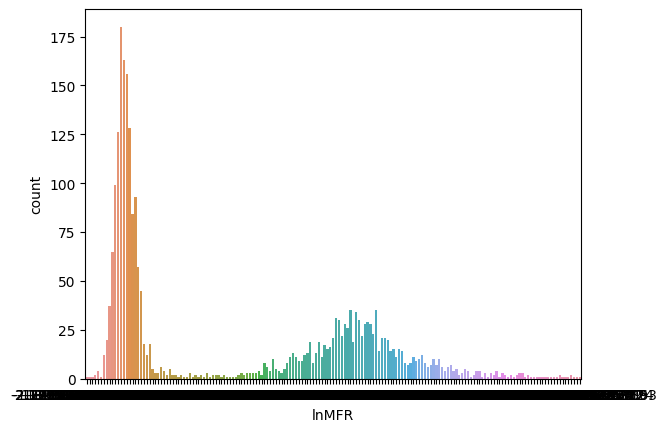

In [ ]:
sns.countplot(x=ds['lnMFR'])

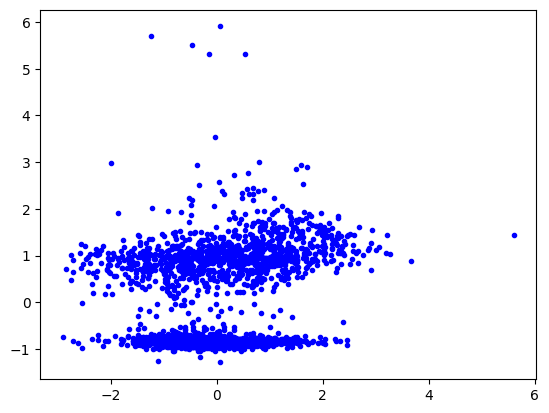

In [ ]:
plt.plot(ds['C2'], ds['MFR'],'b.')

Note the interesting distribution of the data- it has a multimodal Gaussian distribution, in this case with two peaks.

Why not split the data into two parts, one for each Gaussian, then perform regression on each part separately? Will this regression perform better than a single regression algorithm for the full dataset?

First we split the data into two parts, then make train/test splits of each part with

In [ ]:
from sklearn.model_selection import train_test_split
lower_data = ds[ds['lnMFR']<0]
upper_data = ds[ds['lnMFR']>0]
lower_train,lower_test = train_test_split(lower_data, test_size=0.2, shuffle=True,random_state=1)
upper_train,upper_test = train_test_split(upper_data, test_size=0.2, shuffle=True,random_state=1)

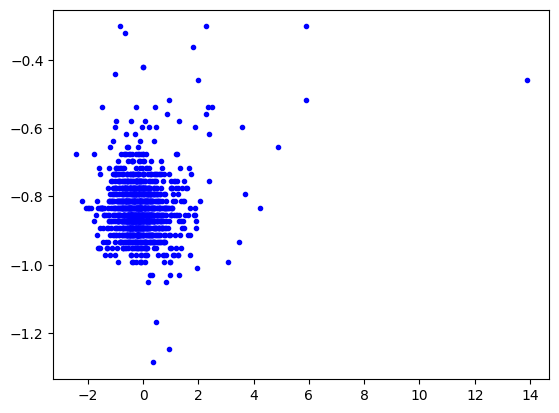

In [ ]:
plt.plot(lower_data['Temp'], lower_data['MFR'],'b.')

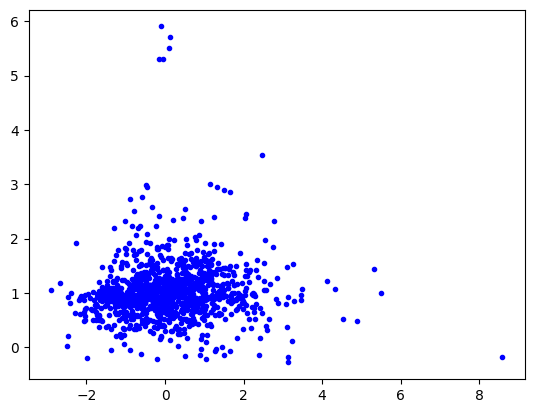

In [ ]:
plt.plot(upper_data['Temp'], upper_data['MFR'],'b.')

Run the following code to test linear regression on the full data set as well as the subsets.

In [ ]:
def fits(data):
    X = ['Temp']
    y = ['MFR']
    # change this if you applied log transformation to your selected variables.
    method = linear_model.LinearRegression()

    model = method.fit(data[X].to_numpy(), data[y].to_numpy())

    MFR_pred = method.predict(data[X].to_numpy())
    r2_model = method.score(data[X].to_numpy(),data['lnMFR'].to_numpy())
    mse_model = mean_squared_error(method.predict(data[X].to_numpy()), data['lnMFR'].to_numpy())

    print('R^2: ' + str(r2_model))
    print('mse: ' + str(mse_model))

    plt.plot(data[X[0]], data[y],'b.', label="Real Data")
    plt.plot(data[X[0]], MFR_pred,'r.', label="Predictions")
    plt.legend()


    return

R^2: -94.34579866409676
mse: 38.549421752907236


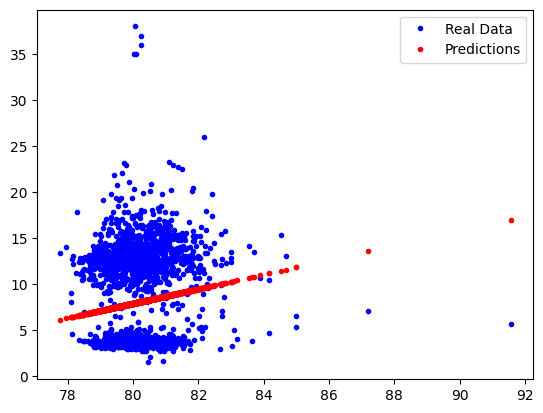

In [ ]:
fits(data)

R^2: -0.04173509309463075
mse: 0.03235635940269502


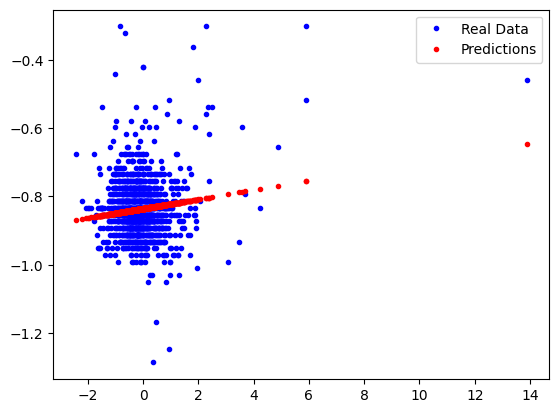

In [ ]:
fits(lower_data)

R^2: -0.028288063232688065
mse: 0.08885947451368041


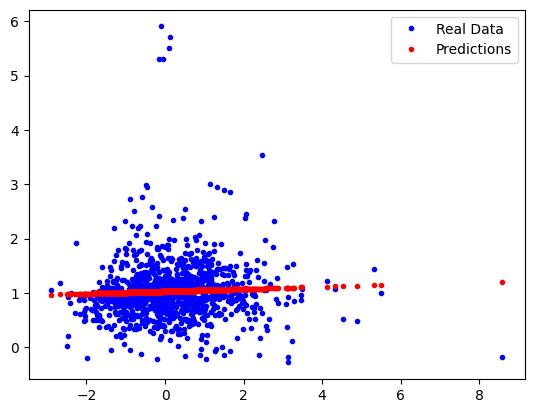

In [ ]:
fits(upper_data)

## **Question 9** (10 points)

Explain what is going on here?  Was it ever a good idea to use linear regression on the whole dataset!?  In particular, what does it mean that the R^2 and mse changed so much?

__Answer__: Here we have split the MFR dataset into two separate sets, positive and negative. This captures each mode of the bimodal distribution we observed when the data was transformed by the natural log.

It seems that linear regression on the whole dataset was not a good idea, because we did not look closely enough the raw data enough to make a decision about how we should use it to create a model.

The fact that the R^2 and mse changed so much can be attributed to the new statistis of the split dataset. Each mode now has a new mean, variance, etc. associated with it.

Specifically looking at the mean will tell us how the values for R^2 and mse changed. We see that an R^2 close to zero means that the residual sum of squares is approximately equal to the total sum of squares. This occurs when the predicted values from our model are very close to the mean value of the dataset. In other words, our model is very good at predicting the mean of the data.

For the mse to have changed (closer to zero) means the averaged sum of squares of 'observed values minus predicted values' must have decreased. It means there is now a smaller difference between the observed values in the data and those predicted by our model. We know mse does have units, and so even if the value is close to zero it may not mean something significant unless we look at the values from the right perspective. But in this case it means our model is now better at predicting MFR.


## **Question 10** **($\infty$ points, since this is where you really learn stuff! :-)**

You can get as many points of extra credit as you like by doing a good job with this question!

Play around with doing a better analysis.  Things to try:

1.   Redo the calculations, but start from the split dataset above.
2.   Try different train and test splits and see if the answer changes (i.e.,
```
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1234)
```
3.   Try different methods such as `linear_model.LinearRegression()`, `KNeighborsRegressor(n_neighbors=20)`, `linear_model.Ridge()`, `linear_model.Lasso()`, or `linear_model.BayesianRidge()`. Can you achieve better performance than any of the previous models?

4.  Answer the following question carefully:  What is the problem with using this method of selecting a model based on its performance on testing data?
